In [ ]:
pip install pyrealsense2


In [ ]:
pip install mtcnn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pyrealsense2 as rs
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from mtcnn import MTCNN
from PIL import Image

In [ ]:
#Function to obtain name of .bag file
def path_leaf(path):
    head, tail = os.path.split(path)
    return os.path.splitext(tail)[0] or os.path.basename(head)

In [ ]:

directory = '/content/drive/MyDrive/Courses/Spring 2021/CSCI5563/Project/Data/Images/Adarsh'
directory2 = '/content/drive/MyDrive/Courses/Spring 2021/CSCI5563/Project/Data/Faces/Adarsh'
input = '/content/drive/MyDrive/Courses/Spring 2021/CSCI5563/Project/Data/Adarsh'

if not os.path.exists(directory):
    os.mkdir(directory)
if not os.path.exists(directory2):
    os.mkdir(directory2)

In [ ]:
def extract_face_from_image(color_img, depth_img, required_size=(224, 224)):
  # load image and detect faces
  detector = MTCNN()
  faces = detector.detect_faces(color_img)

  face_images_c = []
  face_images_d = []

  for face in faces:
    # extract the bounding box from the requested face
    x1, y1, width, height = face['box']
    x2, y2 = x1 + width, y1 + height

    # extract the face
    face_boundary_c = color_img[y1:y2, x1:x2]
    face_boundary_d = depth_img[y1:y2, x1:x2]

    # resize pixels to the model size
    face_image_c = Image.fromarray(face_boundary_c)
    face_image_c = face_image_c.resize(required_size)
    face_array_c = np.asarray(face_image_c)
    face_images_c.append(face_array_c)

    face_image_d = Image.fromarray(face_boundary_d)
    face_image_d = face_image_d.resize(required_size)
    face_array_d = np.asarray(face_image_d)
    face_images_d.append(face_array_d)

  return face_images_c, face_images_d

In [ ]:

pipe = rs.pipeline()
cfg = rs.config()
i = 1
for filename in os.listdir(input):
  input_file = os.path.join(input, filename)
  cfg.enable_device_from_file(input_file)
  cfg.enable_stream(rs.stream.depth, 320, 240, rs.format.z16, 30)
  cfg.enable_stream(rs.stream.color, 640, 480, rs.format.rgb8, 30)

  profile = pipe.start(cfg)

  for x in range(15):
    pipe.wait_for_frames()

  frames = pipe.wait_for_frames()
  depth_frame = frames.get_depth_frame()
  color_frame = frames.get_color_frame()

  #Cleanup
  pipe.stop()
  print("Frame Captured",i)
  i = i+1
  #Copied from below
  color_image = np.asanyarray(color_frame.get_data())
  colorizer = rs.colorizer()
  align = rs.align(rs.stream.color)
  frames = align.process(frames)

  # Update color and depth frames:
  aligned_depth_frame = frames.get_depth_frame()
  colorized_depth = np.asanyarray(colorizer.colorize(aligned_depth_frame).get_data())
  f_name = path_leaf(input_file)
  colorized_depth = cv2.cvtColor(colorized_depth, cv2.COLOR_RGB2BGR)
  color_image = cv2.cvtColor(color_image, cv2.COLOR_RGB2BGR)
  cv2.imwrite(directory + "/" + "D_" + str(f_name) + ".png", colorized_depth)
  cv2.imwrite(directory + "/" + "C_" + str(f_name) + ".png", color_image)

  #Face extraction
  face_clr, face_dpt = extract_face_from_image(color_image, colorized_depth)
  try:
    cv2.imwrite(directory2 + "/" + "C_" + str(f_name) + ".png", face_clr[0])
    cv2.imwrite(directory2 + "/" + "D_" + str(f_name) + ".png", face_dpt[0])
  except:
    pass



(480, 640, 3)


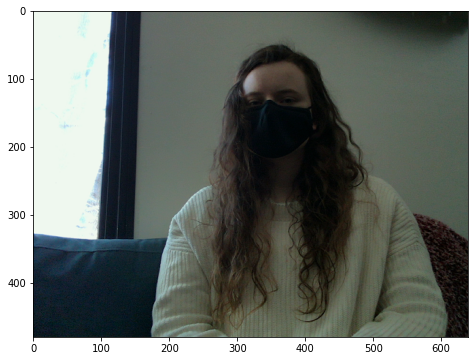

In [ ]:
#Color image
color_image = np.asanyarray(color_frame.get_data())
print(np.shape(color_image))
plt.rcParams["axes.grid"] = False
plt.rcParams['figure.figsize'] = [12, 6]
plt.imshow(color_image)


(240, 320, 3)


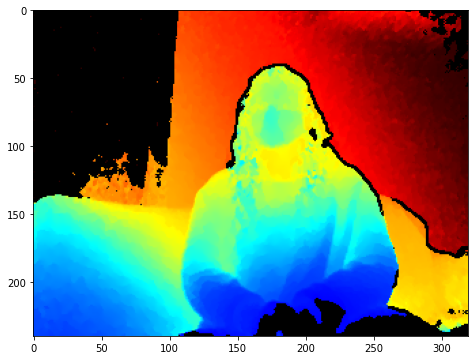

In [ ]:
#Depth image
colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())
print(np.shape(colorized_depth))
plt.imshow(colorized_depth)


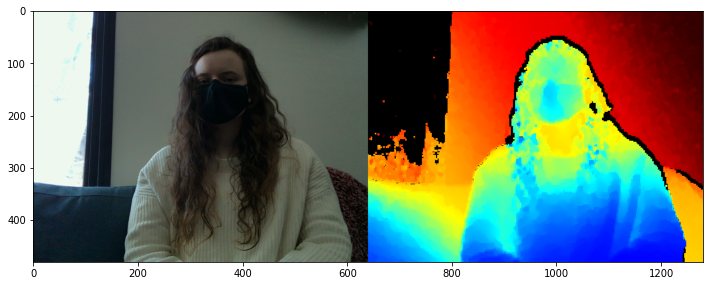

In [ ]:
#Align images
align = rs.align(rs.stream.color)
frames = align.process(frames)

# Update color and depth frames:
aligned_depth_frame = frames.get_depth_frame()
colorized_depth = np.asanyarray(colorizer.colorize(aligned_depth_frame).get_data())

images = np.hstack((color_image, colorized_depth))
plt.imshow(images)


[{'box': [301, 86, 103, 125], 'confidence': 0.9862940907478333, 'keypoints': {'left_eye': (337, 136), 'right_eye': (374, 133), 'nose': (354, 149), 'mouth_left': (340, 176), 'mouth_right': (372, 173)}}]


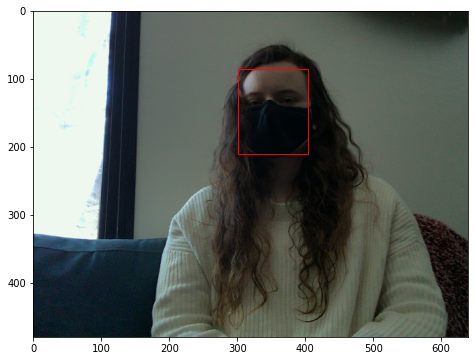

In [ ]:
#Face Detection
# detector = MTCNN()

# faces = detector.detect_faces(color_image)
# print(face)
# from matplotlib.patches import Rectangle
# image = color_image
# plt.imshow(image)
# ax = plt.gca()
# for face in faces:
#   x, y, width, height = face['box']
#   face_border = Rectangle((x, y), width, height,fill=False, color='red')
#   ax.add_patch(face_border)
# plt.show()

In [ ]:

f_name = path_leaf(input)
cv2.imwrite(directory + "/" + "D_" + str(f_name) + ".png", depth_image)
cv2.imwrite(directory + "/" + "C_" + str(f_name) + ".png", color_image)